In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [5]:
#loading the data set
df= pd.read_csv("/Users/rasheedatolaiya/Downloads/shopping_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
#checking the shape of the data set
df.shape

(3900, 19)

In [7]:
#checking the number of columns in the data set
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [8]:
#Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
#data set content
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
#checking for missing/null values
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [11]:
#checking for duplicate values
df.duplicated().sum()

0

# Descriptive Analysis:

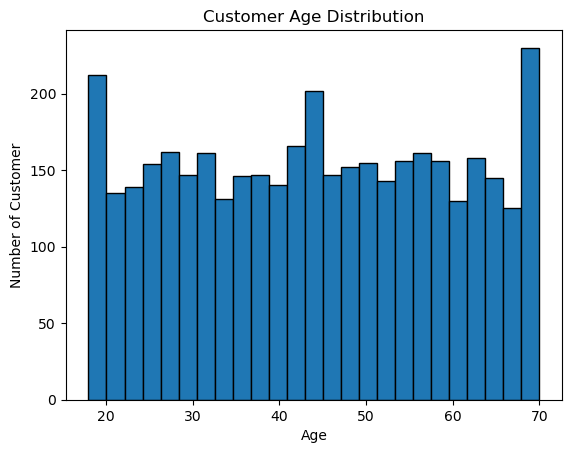

In [15]:
#What is the overall distribution of customer ages in the dataset?

plt.hist(df['Age'], bins=25, edgecolor='k',)
plt.title("Customer Age Distribution")
plt.ylabel("Number of Customer")
plt.xlabel('Age')
plt.show()

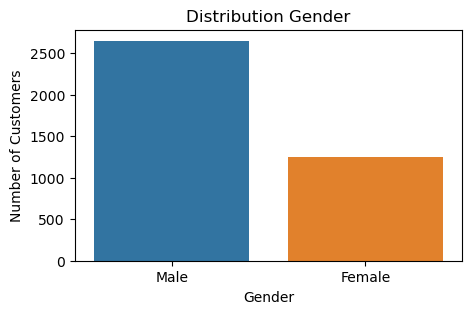

In [25]:
#What is the gender distribution of customers in the dataset?

plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=df)
plt.title('Distribution Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [23]:
df["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

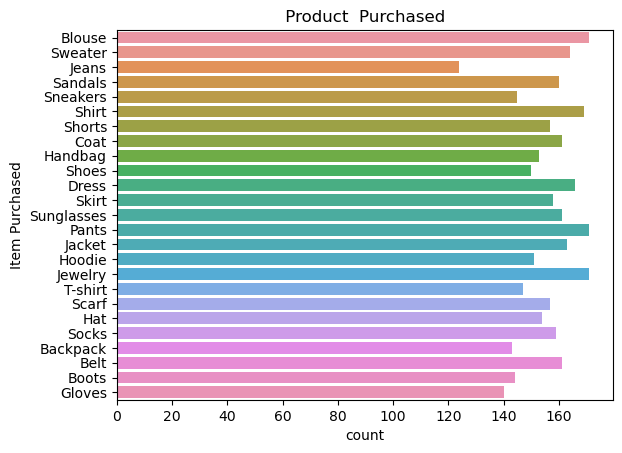

In [24]:
#What are the most frequently purchased items (top products) in the dataset?

sns.countplot(y='Item Purchased',data=df)
plt.title(' Product  Purchased ');

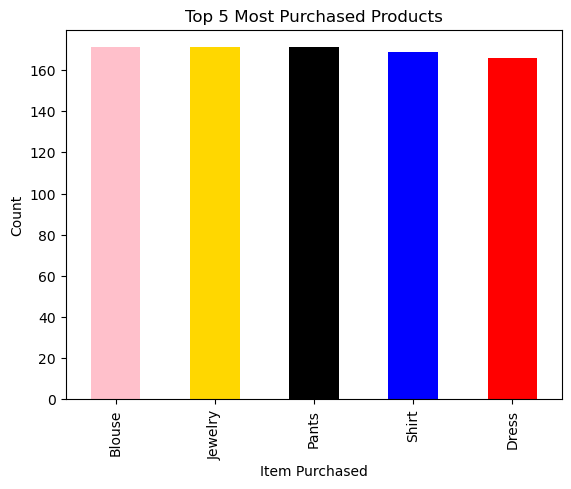

In [26]:
df['Item Purchased'].value_counts().sort_values(ascending=False).head().plot(kind='bar',color=('pink','Gold','black','blue','red'))
plt.title('Top 5 Most Purchased Products')
plt.xlabel("Item Purchased")
plt.ylabel('Count')
plt.show()

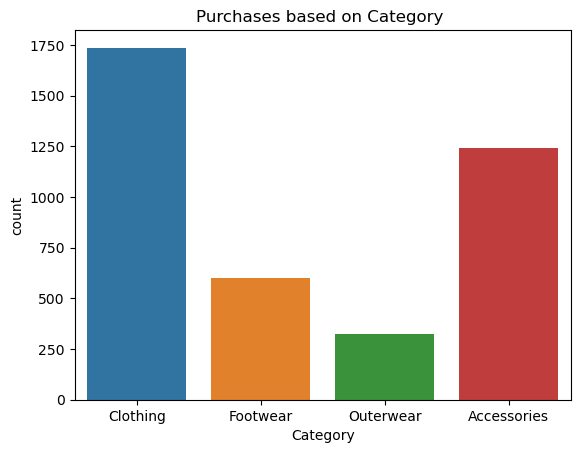

In [27]:
#How are the purchases distributed across different categories of items (e.g., clothing, accessories, shoes)?

sns.countplot(x='Category',data=df)
plt.title('Purchases based on Category ')
plt.show()

In [28]:
#What is the average purchase amount in USD, and how does it vary across different categories of items?

df.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Purchase Amount (USD)'>

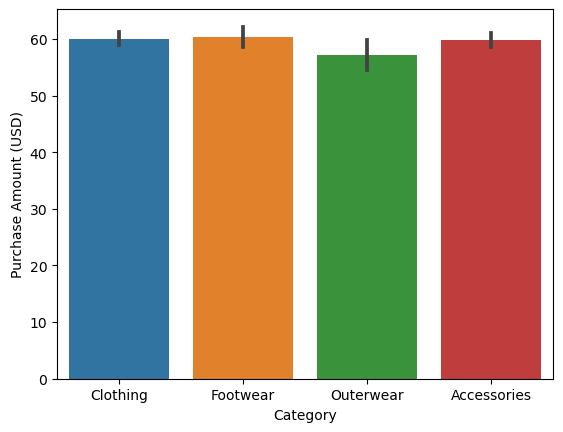

In [29]:
sns.barplot(x='Category',y='Purchase Amount (USD)',data=df)

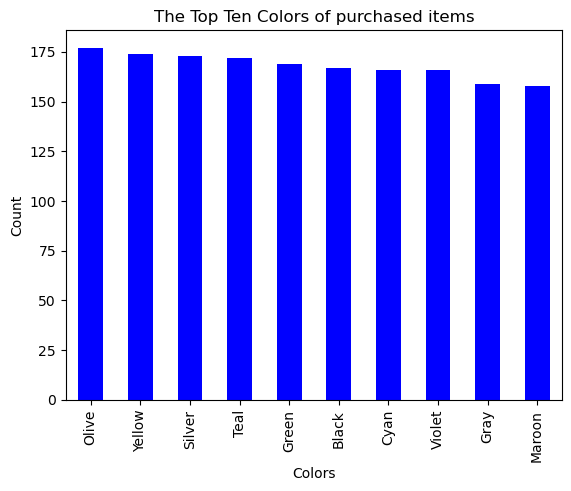

In [30]:
#What are the most popular sizes and colors for purchased items?

df['Color'].value_counts().sort_values(ascending=False).head(10).plot(kind="bar",color='blue')
plt.title("The Top Ten Colors of purchased items")
plt.xlabel("Colors")
plt.ylabel('Count')
plt.show()

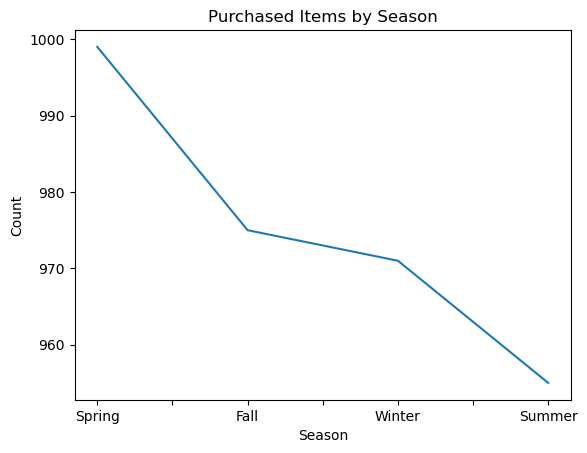

In [31]:
#Can you identify any seasonal shopping trends based on the "Season" column?

df['Season'].value_counts().plot()
plt.title('Purchased Items by Season')
plt.xlabel("Season")
plt.ylabel('Count');

<Figure size 2000x500 with 0 Axes>

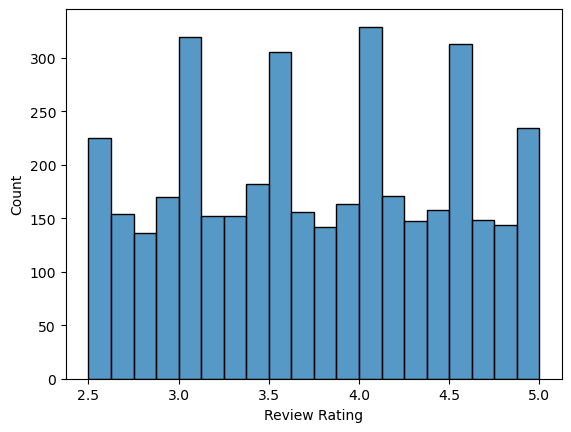

<Figure size 2000x500 with 0 Axes>

In [32]:
#What is the distribution of review ratings given by customers?

sns.histplot(df['Review Rating'],bins=20)
plt.figure(figsize=(20,5))

Subscribers percentage = 27.0 %


Text(0.5, 1.0, 'Subscription Status')

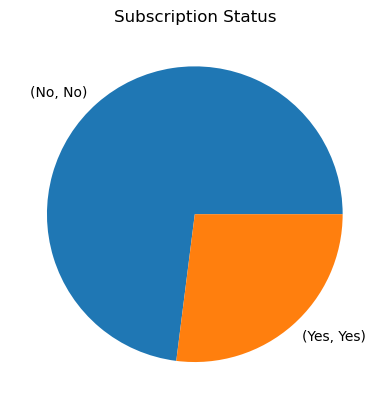

In [34]:
#What percentage of customers have a subscription, and does subscription status impact purchase behavior?

no_of_subscribers=(df['Subscription Status']=='Yes').sum()
Total_no_of_customers=len(df)
percentage_of_subscribers=(no_of_subscribers*100)/Total_no_of_customers
print('Subscribers percentage =',percentage_of_subscribers,'%')
df.groupby('Subscription Status')['Subscription Status'].value_counts().plot(kind="pie")
plt.ylabel('')
plt.title('Subscription Status')

In [35]:
#What are the preferred shipping types among customers, and is there a correlation between the purchase amount or frequency?

df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

<AxesSubplot:xlabel='Shipping Type'>

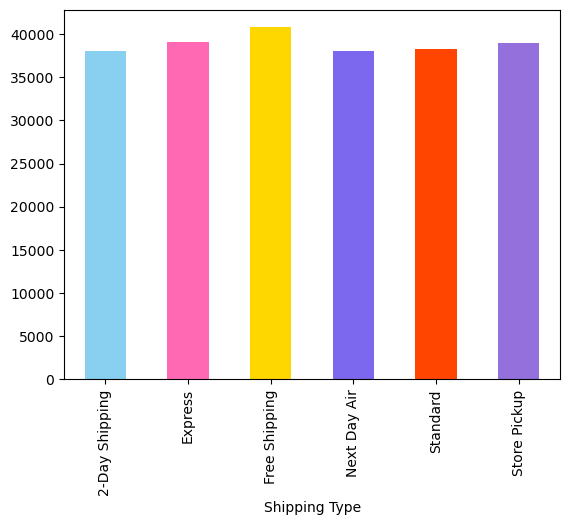

In [36]:
df.groupby('Shipping Type')['Purchase Amount (USD)'].sum().plot(kind='bar',color=colors)

In [37]:
df.groupby('Shipping Type')['Frequency of Purchases'].value_counts()

Shipping Type   Frequency of Purchases
2-Day Shipping  Every 3 Months             97
                Monthly                    95
                Quarterly                  93
                Fortnightly                89
                Bi-Weekly                  87
                Annually                   84
                Weekly                     82
Express         Bi-Weekly                 100
                Every 3 Months             99
                Annually                   96
                Weekly                     94
                Fortnightly                88
                Quarterly                  85
                Monthly                    84
Free Shipping   Annually                  112
                Weekly                    110
                Every 3 Months            101
                Quarterly                 101
                Monthly                    90
                Bi-Weekly                  82
                Fortnightly              

Text(0.5, 1.0, 'Discounts')

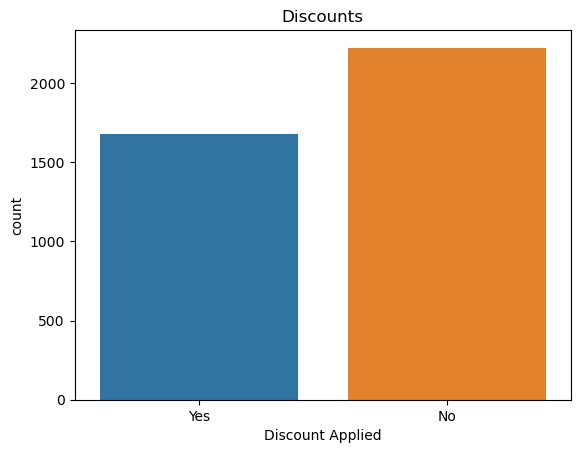

In [38]:
#How frequently are discounts applied, and does this impact the purchase amount?

sns.countplot(x='Discount Applied',data=df)
plt.title('Discounts')

<AxesSubplot:xlabel='Discount Applied', ylabel='Purchase Amount (USD)'>

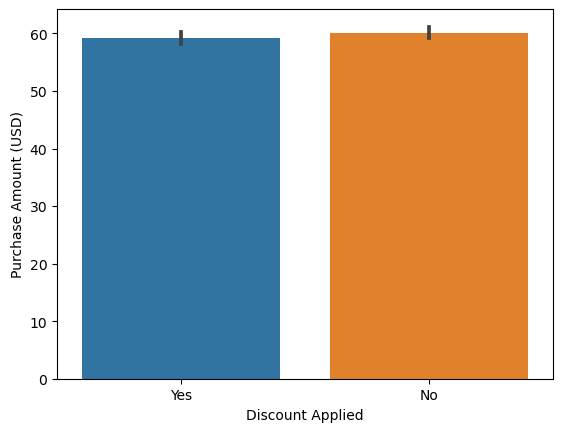

In [39]:
sns.barplot(x='Discount Applied',y='Purchase Amount (USD)',data=df)

Text(0.5, 1.0, 'Promo code users')

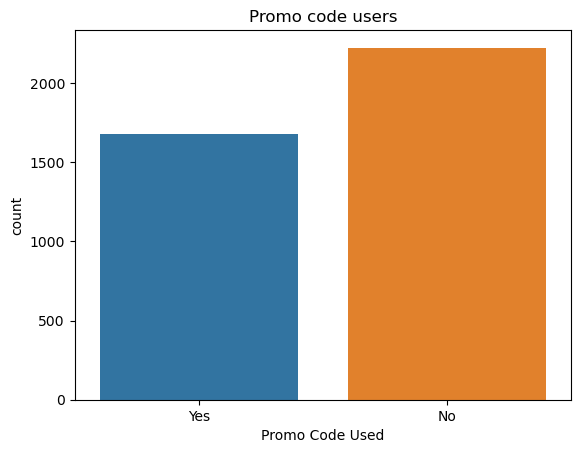

In [40]:
#How often do customers use promo codes, and does it vary by gender or age group?

sns.countplot(x='Promo Code Used',data=df)
plt.title('Promo code users')

Text(0.5, 1.0, 'Promo code user based on gneder')

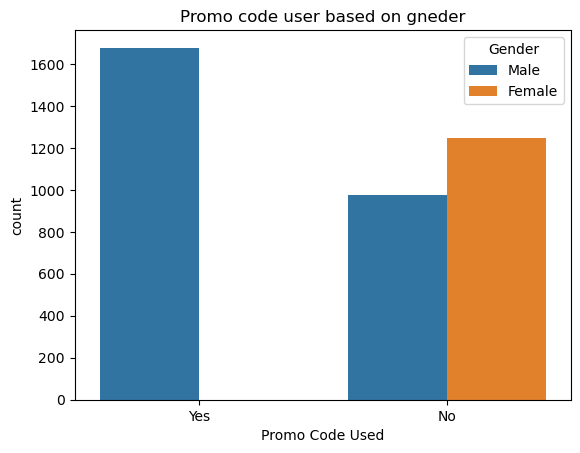

In [41]:
sns.countplot(x='Promo Code Used',data=df,hue='Gender')
plt.title('Promo code user based on gneder')

# Diagnostic Analysis:

<AxesSubplot:xlabel='Gender', ylabel='Previous Purchases'>

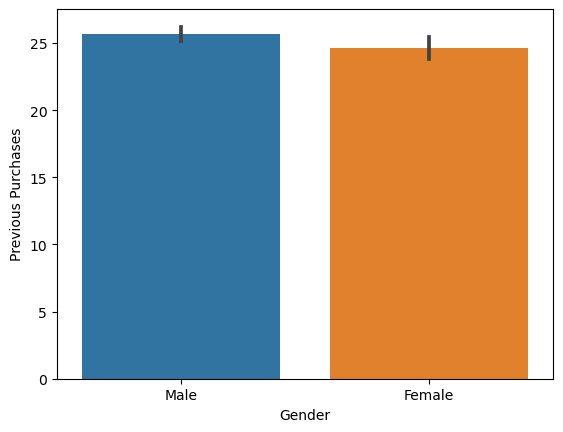

In [42]:
#Are there any significant differences in purchase behavior between male and female customers?

sns.barplot(x='Gender',y='Previous Purchases',data=df)

Text(0.5, 1.0, 'Frequency of Purchases based on Gender')

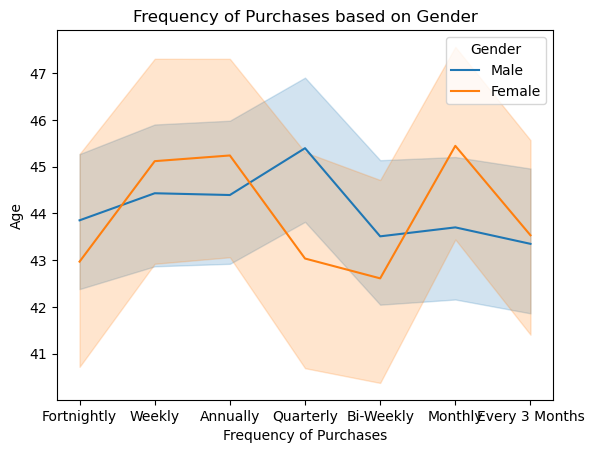

In [43]:
#Can you identify any patterns in the frequency of purchases (e.g., weekly, fortnightly, monthly) and how they relate to other variables like age or gender?

sns.lineplot(x='Frequency of Purchases',y='Age',data=df,hue='Gender')
plt.title('Frequency of Purchases based on Gender')

In [44]:
#Are there specific categories or items that are more likely to lead to high or low review ratings?

df.groupby("Category")['Review Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

<Figure size 1000x300 with 0 Axes>

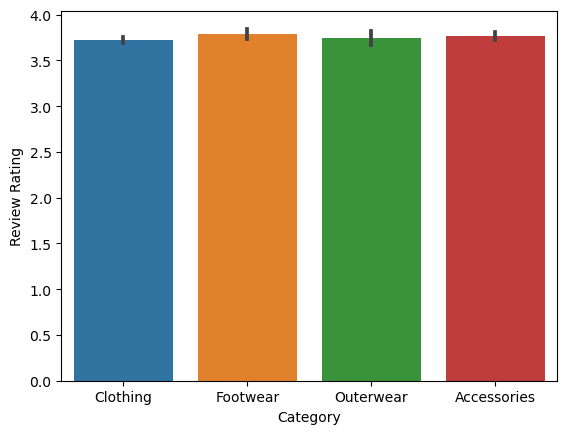

<Figure size 1000x300 with 0 Axes>

In [45]:
sns.barplot(x='Category',y='Review Rating',data= df)
plt.figure(figsize=(10,3))

<AxesSubplot:xlabel='Frequency of Purchases,Subscription Status'>

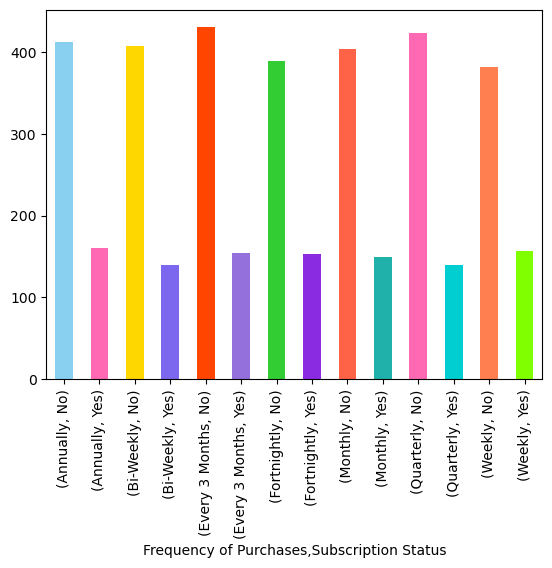

In [46]:
#Is there a relationship between having a subscription and making more frequent purchases?

df.groupby('Frequency of Purchases')['Subscription Status'].value_counts().plot(kind='bar',color=colors)

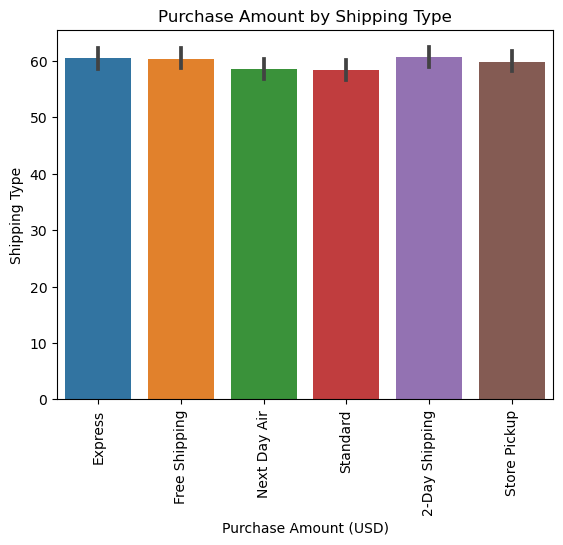

<Figure size 1000x300 with 0 Axes>

In [47]:
#Does the choice of shipping type impact the purchase amount, and are there geographical variations in shipping preferences?

sns.barplot(x='Shipping Type', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Shipping Type')
plt.xticks(rotation =90)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Shipping Type')
plt.figure(figsize=(10,3))

plt.show()

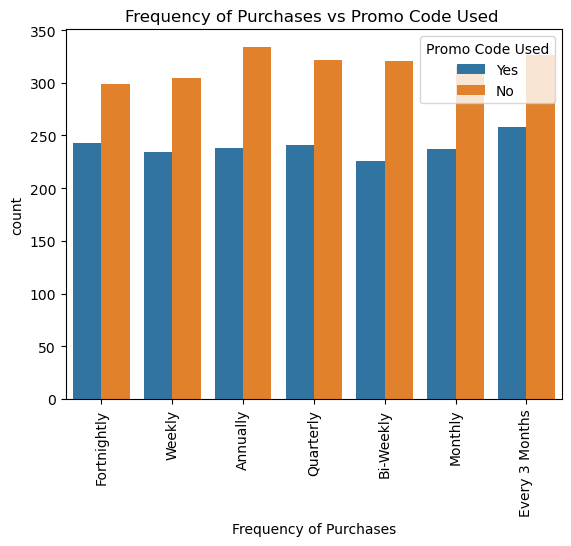

In [48]:
#Are there any interesting insights related to the use of promo codes, such as which customer segments use them more frequently?

plt.title('Frequency of Purchases vs Promo Code Used ')
sns.countplot(x='Frequency of Purchases',hue='Promo Code Used',data=df)
plt.xticks(rotation=90)
plt.show()

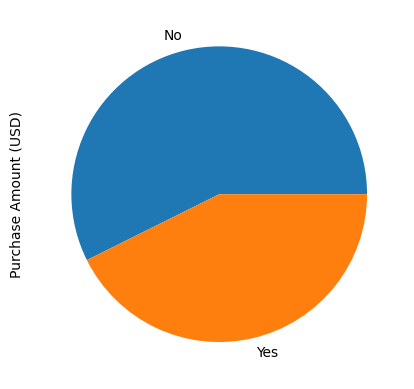

Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

In [50]:
#How do items with discounts applied compare to those without in terms of purchase amount and frequency?¶

df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().plot(kind='pie')
plt.show()
df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

In [51]:
df.pivot_table(index ="Discount Applied",values='Purchase Amount (USD)',aggfunc=['mean','sum'])
df.pivot_table(index ="Frequency of Purchases",values='Purchase Amount (USD)',aggfunc=['mean','sum'])
df.pivot_table(index =["Frequency of Purchases","Discount Applied"],values='Purchase Amount (USD)',aggfunc=['mean','sum'])

mean  \
                                        Purchase Amount (USD)   
Frequency of Purchases Discount Applied                         
Annually               No                           60.673653   
                       Yes                          59.470588   
Bi-Weekly              No                           60.532710   
                       Yes                          60.924779   
Every 3 Months         No                           60.687117   
                       Yes                          59.317829   
Fortnightly            No                           59.632107   
                       Yes                          58.341564   
Monthly                No                           59.528481   
                       Yes                          59.067511   
Quarterly              No                           60.214286   
                       Yes                          59.676349   
Weekly                 No                           59.540984   
                       Yes                          58.230769   

                                                          sum  
                                        Purchase Amount (USD)  
Frequency of Purchases Discount Applied                        
Annually               No                               20265  
                       Yes                              14154  
Bi-Weekly              No                               19431  
                       Yes                              13769  
Every 3 Months         No                               19784  
                       Yes                              15304  
Fortnightly            No                               17830  
                       Yes                              14177  
Monthly                No                               18811  
                       Yes                              13999  
Quarterly              No                               19389  
                       Yes                              14382  
Weekly                 No                               18160  
                       Yes                              13626

# Descriptive Analytics Questions for Business Improvement:

In [53]:
#What is the average purchase amount (in USD) per customer, and how can it be increased?

mean_purchse_amount=df.groupby('Customer ID')['Purchase Amount (USD)'].mean()
mean_purchse_amount=mean_purchse_amount.astype(int)
mean_purchse_amount

Customer ID
1       53
2       64
3       73
4       90
5       49
        ..
3896    28
3897    49
3898    33
3899    77
3900    81
Name: Purchase Amount (USD), Length: 3900, dtype: int64

Text(0.5, 1.0, 'Most Profitable Categories')

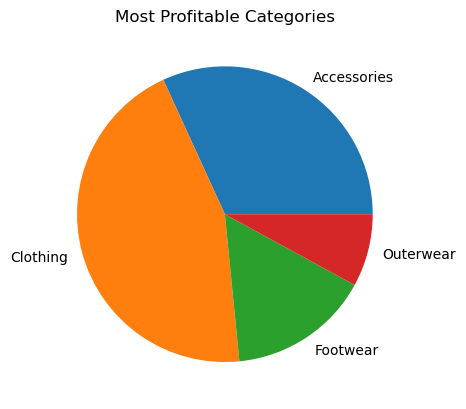

In [54]:
#Can we identify the most profitable categories and items, and should we focus more on promoting them?

df.groupby('Category')['Purchase Amount (USD)'].sum().plot(kind='pie')
plt.ylabel('')
plt.title("Most Profitable Categories")

Text(0, 0.5, 'Purchase Amount (USD)')

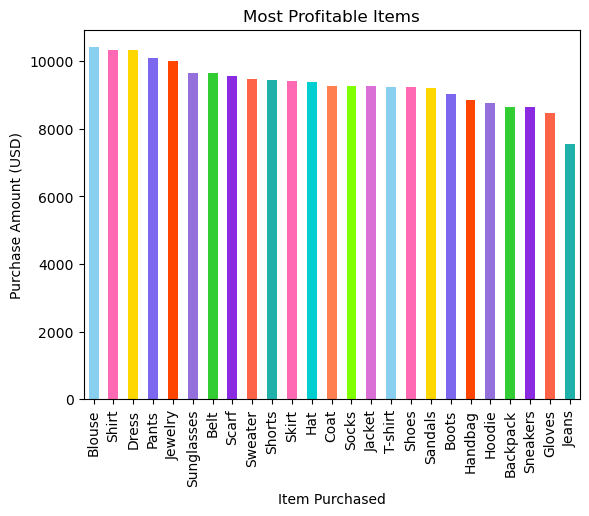

In [55]:
df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title("Most Profitable Items")
plt.ylabel('Purchase Amount (USD)')